# Budget64

## Visualising

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.defchararray import add as npStrAdd
tdata = pd.read_pickle('Transaction.pkl')
bdata = pd.read_pickle('Budget.pkl')
months = np.array(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

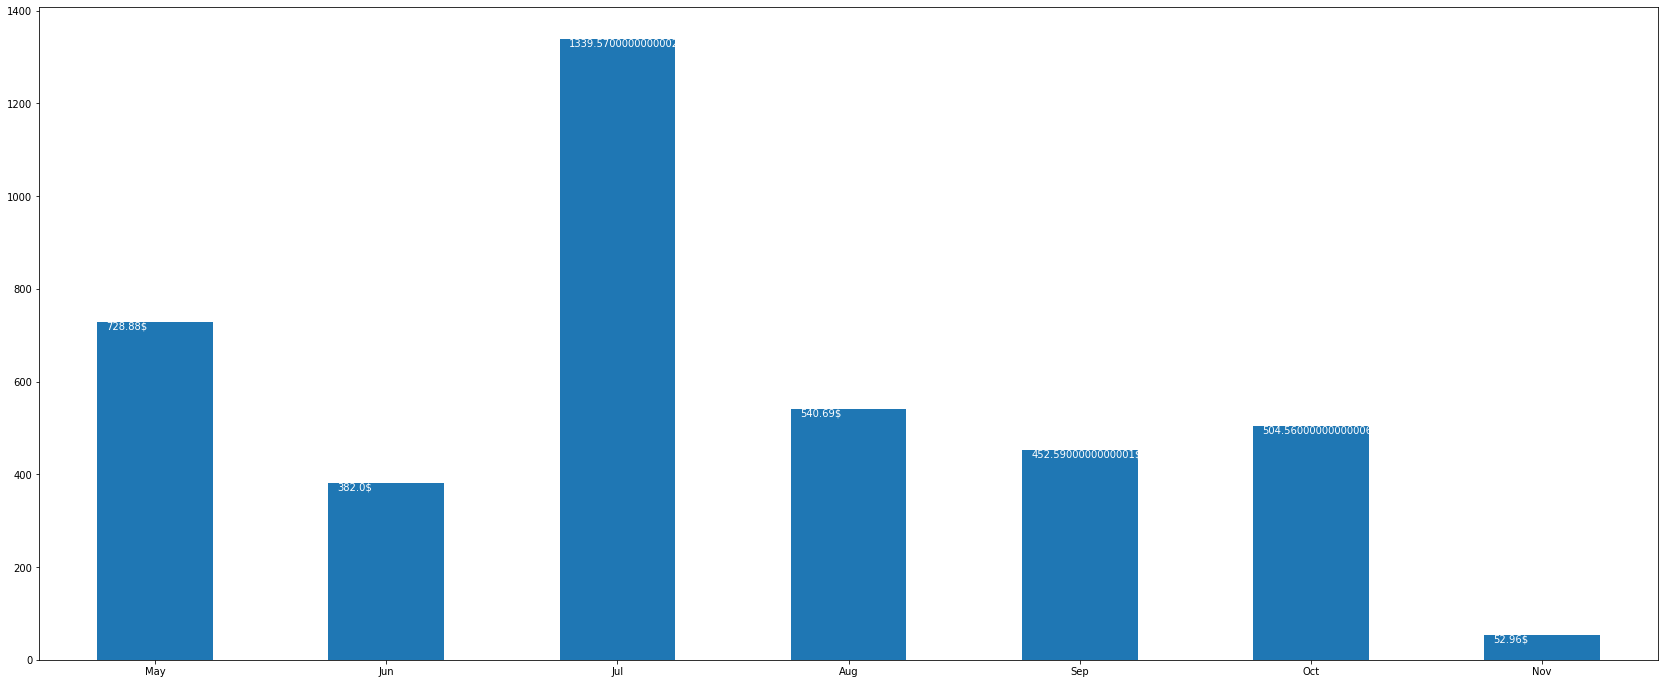

In [2]:
cat = 'Shopping'
year = 2019

mask = (tdata['Date'].dt.year == year) & (tdata['Category'] == cat)
df = tdata[mask]
grouped = df.groupby(by=df['Date'].dt.month)['Amt'].sum()
grouped.index = pd.CategoricalIndex(months[grouped.index])

fig, ax = plt.subplots(figsize=(29,12))
ax = grouped.plot.bar(x='Date', y='Amt', rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '$', (p.get_x()+0.04, p.get_height() - 15), c='white')

           Budget      Amt
Shopping      NaN   540.69
Transport     NaN   387.42
Eat-Out       NaN   173.48
Cash          NaN   472.50
House         NaN  2080.00
Groceries     NaN   424.12
Utilities     NaN   223.56
Visa          NaN  1781.78
Total: 6083.55


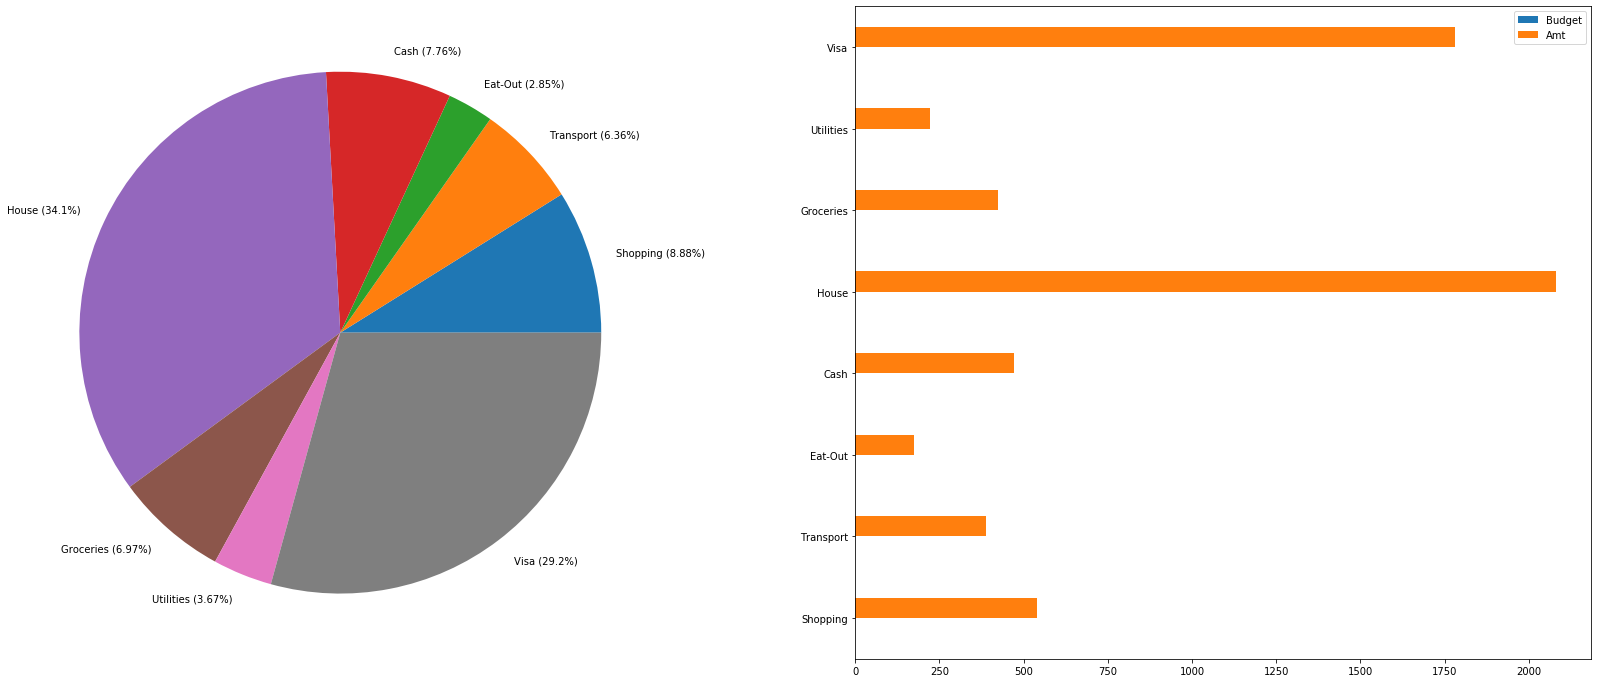

In [7]:
month = 8
year  = 2019

tmask = (tdata['Date'].dt.year  == year) & (tdata['Date'].dt.month == month)
bmask = (bdata['Month'].dt.year == year) & (bdata['Month'].dt.month == month)
df = tdata[tmask]
budget = bdata[bmask]['Budget']
budget.index = pd.CategoricalIndex(bdata[bmask]['Category'])

cats = df['Category'].unique().astype('str')
total = np.zeros(cats.shape)
for i in range(cats.shape[0]):
    total[i] = df[df['Category'] == cats[i]]['Amt'].sum()
    
grouped = pd.Series(total, name='Amt', index=pd.CategoricalIndex(cats))

df = pd.concat([budget, grouped], axis=1)
df = df.dropna(axis=0, how='all')

ratio = (total *100 / sum(total)).astype('|S4').astype('str')
cats = npStrAdd( npStrAdd(npStrAdd(cats,' (') , ratio) , '%)')


fig, ax = plt.subplots(1,2, figsize=(29,12))
ax[0].pie(total, labels=cats)

df.plot.barh(ax=ax[1])
ax[1].legend()    

print(df)
print('Total: {}'.format(df['Amt'].sum()))